## Sleep Health Analysis

### Business objective: create a new health app. 

##### Original idea: Create a wearable device that helps users increase daily activity, which indirectly impacts sleep duration. 

- H0: There is no relationship between sleep duration (X) and physical fitness duration (y)
- H1: There is a statistically significant relationship between variable X and variable y.

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import cleaning as cl
import functions as fn
import importlib
importlib.reload(cl)
importlib.reload(fn)
from scipy.stats import pearsonr
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
health = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/sleep-heath-analysis/data/Sleep_health_and_lifestyle_dataset.csv")
health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# view NA
health["Sleep Disorder"].isnull().sum()

np.int64(219)

In [5]:
# view unique to understand what NaNs are
health["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
# call function for cleaning all data
health = cl.clean_data(health)
# fill NaN values with "None"
# turn columns into lowercase
# replace " " with "_" in column nanes
# rename columns
# remove duplicates
health.head()

,id,gender,age,occupation,sleep_hours,sleep_quality,activity_min_per_day,stress_level,bmi_category,blood_pressure,rhr,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## EDA

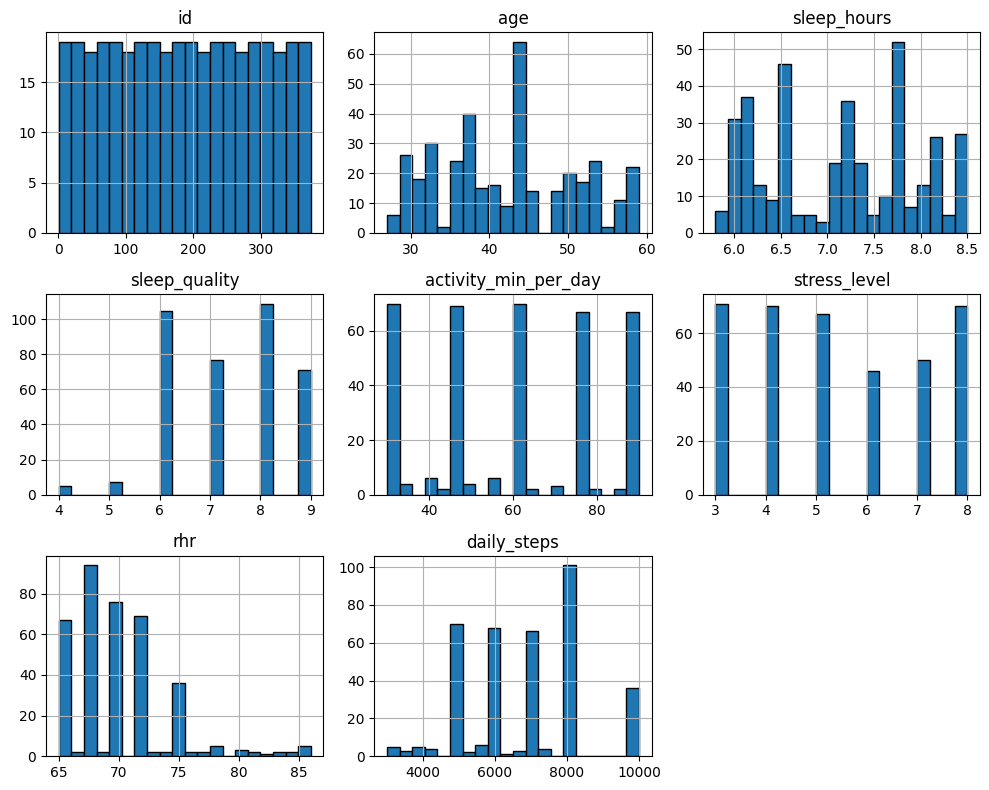

In [7]:
# all numeric histograms in one grid
health.hist(bins=20, figsize=(10, 8), edgecolor="black")
plt.tight_layout()
plt.show()

In [8]:
print("Avg. Sleep Hours: ", str(health.sleep_hours.mean().round(2)))
print("Median Sleep Hours: ", str(health.sleep_hours.median().round(2)))

Avg. Sleep Hours:  7.13
Median Sleep Hours:  7.2


### Sleep and activity

Text(0, 0.5, 'Sleep Hours per Night')

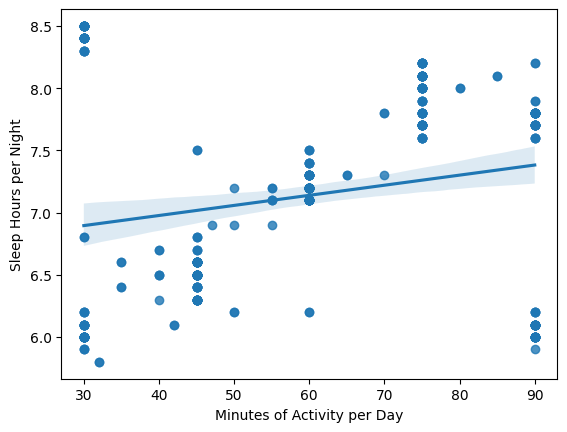

In [9]:
sns.regplot(
    data=health,
    x="activity_min_per_day",
    y="sleep_hours"
    
)
plt.xlabel("Minutes of Activity per Day")
plt.ylabel("Sleep Hours per Night")

**Observations:** 
Generally, more physical activity associates with more sleep. But the clusters suggest the data might be somewhat artificial or grouped (maybe survey categories?).

In [10]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['activity_min_per_day'], health['sleep_hours'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Activity & Sleep: ", correlation)
print("P-value, Activity & Sleep: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Activity & Sleep:  0.21236031472575906
P-value, Activity & Sleep:  3.4666184358492465e-05
r-squared:  0.04509690327042344
r-squared percent: 4.51%


**Observations:** A correlation coefficient of 0.21 shows a slightly positive relationship between the variables. Further analysis shows an r-squared of 0.04. This means only 4% of the variation in people's sleep can be attributed to activity levels. The other 96% is due to other factors. But a  A p-value well below 0.05 shows strong statistical evidence against our null hypothesis, suggesting that there is a statistically significant relationship between sleep duration and physical fitness duration.*

### Activity levels and stress levels

Text(0, 0.5, 'Minutes of Activity per Day')

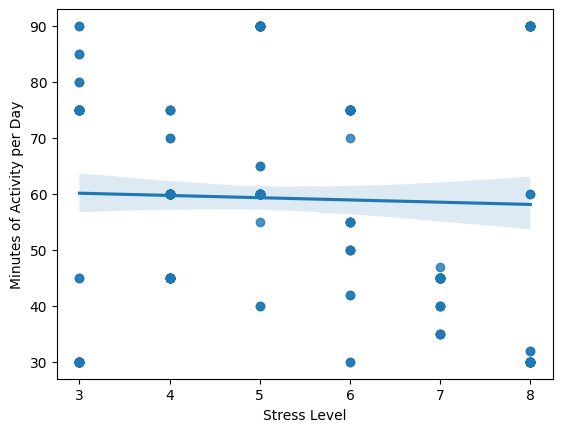

In [11]:
sns.regplot(
    data=health,
    x="stress_level",
    y="activity_min_per_day"
    
)
plt.xlabel("Stress Level")
plt.ylabel("Minutes of Activity per Day")

**Observations:** There is no correlation between activity and stress. This increases the likelyhood that other variables have more impact on sleep duration.

In [12]:
# Pick predictors and outcome
features = ["age", "sleep_quality", "activity_min_per_day", "stress_level", "bmi_category", 
            "blood_pressure", "rhr", "daily_steps", "sleep_disorder"]
outcome = "sleep_hours"

# Calculate correlations with outcome
correlations = health[features + [outcome]].corr(numeric_only=True)[outcome].sort_values(ascending=False)

print(correlations)

sleep_hours             1.000000
sleep_quality           0.883213
age                     0.344709
activity_min_per_day    0.212360
daily_steps            -0.039533
rhr                    -0.516455
stress_level           -0.811023
Name: sleep_hours, dtype: float64


### Stress and sleep

Text(0, 0.5, 'Sleep Hours per Night')

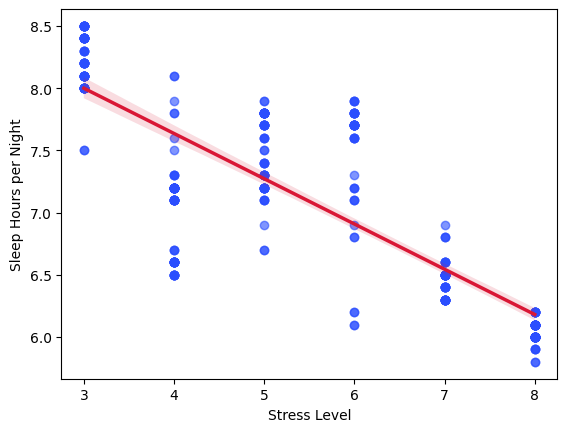

In [72]:
sns.regplot(
    data=health,
    x="stress_level",
    y="sleep_hours",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours per Night")

**Observations:** The regplot confirms the correlation analysis, showing a strong and direct negative trend between sleep and stress. 

In [14]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['stress_level'], health['sleep_hours'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Stress & Sleep: ", correlation)
print("P-value, Stress & Sleep: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Stress & Sleep:  -0.8110230278940431
P-value, Stress & Sleep:  1.2378076181537577e-88
r-squared:  0.6577583517744219
r-squared percent: 65.78%


**Observations:** We can see from our r-squared that stress explains ~66% of the variation in sleep hours—much stronger than activity levels. The low p-value (<0.05) gives confidence that this high variation is not due to an error or chance.  

### RHR and stress

Text(0, 0.5, 'Stress Level')

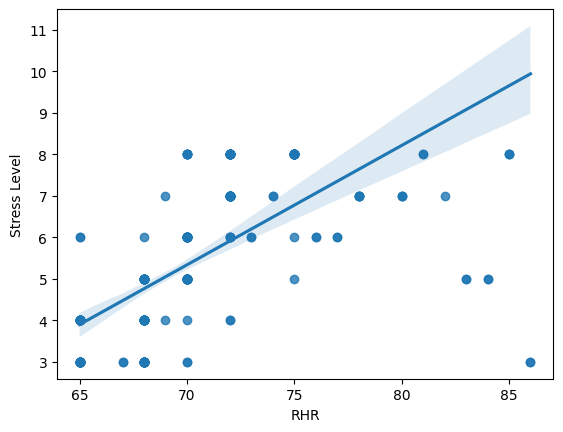

In [15]:
sns.regplot(
    data=health,
    x="rhr",
    y="stress_level"
)
plt.xlabel("RHR")
plt.ylabel("Stress Level")

**Observation:** The cluster at the bottom (where the CI is tightest) indicates that lower RHR is associated with lower stress level. 

In [16]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['stress_level'], health['rhr'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Stress & Resting Heart Rate: ", correlation)
print("P-value, Stress & Resting Heart Rate: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Stress & Resting Heart Rate:  0.6700264629986893
P-value, Stress & Resting Heart Rate:  4.492926517161453e-50
r-squared:  0.44893546111853394
r-squared percent: 44.89%


**Observation:** Stress explains 45% of the variation in sleep duration. This is another strong datapoint showing that stress is a key variable in sleep length. 

Text(0, 0.5, 'Sleep Quality')

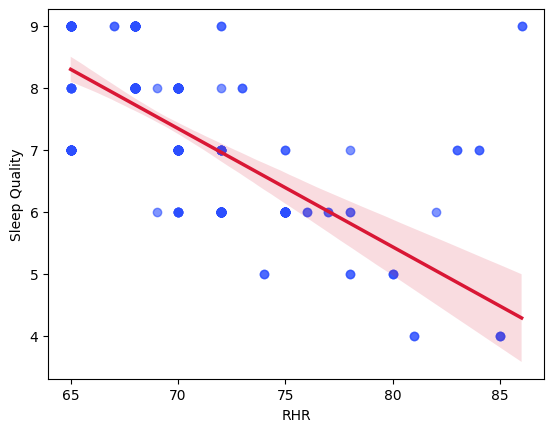

In [73]:
sns.regplot(
    data=health,
    x="rhr",
    y="sleep_quality",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("RHR")
plt.ylabel("Sleep Quality")

In [18]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['sleep_quality'], health['rhr'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Sleep Quality & Resting Heart Rate: ", correlation)
print("P-value, Sleep Quality & Resting Heart Rate: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Sleep Quality & Resting Heart Rate:  -0.6598647331480081
P-value, Sleep Quality & Resting Heart Rate:  4.1319986233668486e-48
r-squared:  0.43542146605249193
r-squared percent: 43.54%


**Observation:** Stress explains 44% of the variation in sleep quality. This is another strong datapoint showing that stress is a key variable in a person's ability to sleep. 

Text(0, 0.5, 'sleep hours')

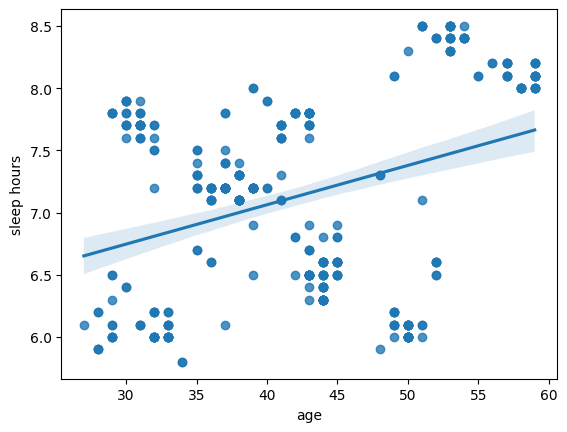

In [19]:
sns.regplot(
    data=health,
    x="age",
    y="sleep_hours"
    
)
plt.xlabel("age")
plt.ylabel("sleep hours")

### BMI categories and sleep

Text(0, 0.5, 'Sleep Hours')

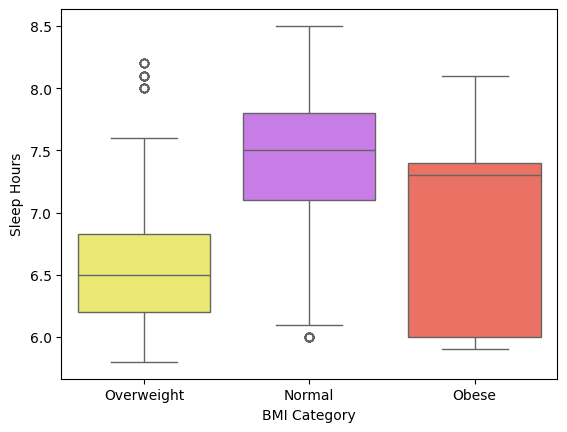

In [80]:
sns.boxplot(
    data=health,
    x="bmi_category",
    y="sleep_hours",
    hue="bmi_category",
    palette=["#fffc5f", "#cf6bf7", "#ff604e"]
)
plt.xlabel("BMI Category")
plt.ylabel("Sleep Hours")

In [21]:
df_normal = health[health["bmi_category"]=="Normal"]["sleep_hours"]
df_overweight = health[health["bmi_category"]=="Overweight"]["sleep_hours"]
df_obease = health[health["bmi_category"]=="Obese"]["sleep_hours"]

# H0: BMI does not impact sleep hours
# H1: BMI does impact sleep hours

#Significance level: 5%
alpha = 0.05

results = st.f_oneway(df_normal, df_overweight, df_obease)
print("Results: ", str(results))


Results:  F_onewayResult(statistic=np.float64(31.001718690897327), pvalue=np.float64(3.545813768064132e-13))


**Observations:** The boxplot showed variation in sleep hours between BMI groups—generally lower for overweight and obese people. The boxplot was chosen in order to handle outliers. A simple bar chart showed much less variation between groups due to these outliers distorting the mean. To confirm the hypothesis that BMI impacts sleep, I ran an ANOVA test. A large f-statistic (31) and extremely small p-value (<0.05) indicates that we can reject the null hypothesis. 

### Blood Pressure and Stress

In [22]:
# apply function to create columns for systolic and diastolic
health = fn.create_bp_columns(health)

In [ ]:
# apply function to create rows for blood pressure categories 
health["bp_category"] = health.apply(fn.bp_category, axis=1)

health["bp_category"].value_counts()

bp_category
High (Stage 1)    232
High (Stage 2)    100
Normal             41
Elevated            1
Name: count, dtype: int64

In [87]:
health_filtered = health[health['bp_category'] != 'Elevated']

Text(0, 0.5, 'Stress level')

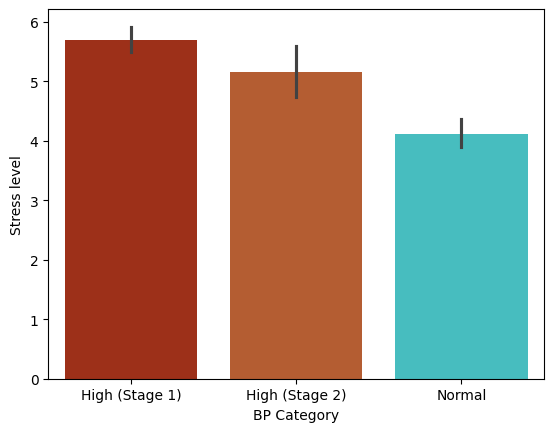

In [96]:
sns.barplot(
    data=health_filtered,
    x="bp_category",
    y="stress_level",
    hue="bp_category",
    palette=["#B32103", "#ca561c", "#33d0d3"]
)
plt.xlabel("BP Category")
plt.ylabel("Stress level")


# elevated n=1, not statistically significant

In [25]:
bp_normal = health[health["bp_category"]=="Normal"]["stress_level"]
bp_high_1 = health[health["bp_category"]=="High (Stage 1)"]["stress_level"]
bp_high_2 = health[health["bp_category"]=="High (Stage 2)"]["stress_level"]

# H0: High stress is not correlated to high blood pressure
# H1: High stress is correlated to high blood pressure

#Significance level: 5%
alpha = 0.05

results = st.f_oneway(bp_normal, bp_high_1, bp_high_2)
print("Results: ", str(results))


Results:  F_onewayResult(statistic=np.float64(16.07468925983478), pvalue=np.float64(2.0213876326838604e-07))


**Observations:** Stress and high blood pressure have a statistically significant relationship.

In [26]:
# Pick predictors and outcome
features = ["age", "sleep_quality", "activity_min_per_day", "stress_level", "bmi_category", 
            "blood_pressure", "sleep_hours", "daily_steps", "sleep_disorder"]
outcome = "rhr"

# Calculate correlations with outcome
correlations = health[features + [outcome]].corr(numeric_only=True)[outcome].sort_values(ascending=False)

print(correlations)

rhr                     1.000000
stress_level            0.670026
activity_min_per_day    0.136971
daily_steps            -0.030309
age                    -0.225606
sleep_hours            -0.516455
sleep_quality          -0.659865
Name: rhr, dtype: float64


# Machine Learning 

In [27]:
# reshape the data from 1D to 2D
X = health[['stress_level']]  
y = health['sleep_hours']

In [28]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [29]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predictions
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
print("predicted values:", predictions)

# Print coefs
print("intercept:", lm.intercept_, "coeficent:", lm.coef_)

# R² score
r2 = lm.score(X_test, y_test)

# Errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

predicted values: [8.0109297  7.64719826 6.1922725  6.55600394 6.55600394 8.0109297
 6.55600394 7.28346682 6.55600394 6.1922725  6.91973538 6.55600394
 6.55600394 6.1922725  7.64719826 8.0109297  6.91973538 7.28346682
 6.1922725  8.0109297  6.55600394 7.64719826 7.28346682 6.1922725
 6.1922725  8.0109297  8.0109297  7.28346682 7.28346682 6.91973538
 6.55600394 7.64719826 7.64719826 8.0109297  8.0109297  6.91973538
 6.91973538 8.0109297  7.64719826 6.55600394 8.0109297  6.55600394
 6.1922725  6.55600394 6.91973538 6.1922725  7.64719826 8.0109297
 7.64719826 6.1922725  7.64719826 6.1922725  6.55600394 7.64719826
 7.28346682 7.28346682 8.0109297  7.28346682 6.55600394 8.0109297
 7.64719826 8.0109297  8.0109297  7.64719826 6.55600394 7.28346682
 6.1922725  7.28346682 7.64719826 7.64719826 6.91973538 6.1922725
 8.0109297  6.55600394 7.28346682]
intercept: 9.10212402220993 coeficent: [-0.36373144]
R²: 0.6793485456608541
MSE: 0.20106470821099756
Root Mean Squared Error: 0.4484023954117524
Mea

**Observations:** 
- Intercept: 91.2 hours (theoretical sleep with zero stress)
- Coeficent: -0.37. For every 1-point increase in stress you lose .37 hours (22 minutes) of sleep.
- R-squared: Model explains 61% fo variance in unseen data.
- MAE: 0.35 hours (~21 minutes average error in predictions)

# Connecting an API: Our World In Data

In [30]:
import pandas as pd
import requests

# Fetch the data.
cvd_data = pd.read_csv("https://ourworldindata.org/grapher/death-rate-from-cardiovascular-disease-age-standardized-ghe.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/death-rate-from-cardiovascular-disease-age-standardized-ghe.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [41]:
cvd_data = cl.clean_cvd_data(cvd_data) # apply wraper function

#view by top 15
cvd_2021 = cvd_data[cvd_data["year"] == 2021].sort_values(by="cvd_death_rate", ascending=True)

cvd_2021

,country,code,year,cvd_death_rate
3409,San Marino,SMR,2021,60.133038
3717,South Korea,KOR,2021,60.415630
1979,Japan,JPN,2021,69.253530
1451,France,FRA,2021,70.002360
1913,Israel,ISR,2021,70.687570
...,...,...,...,...
2529,Micronesia (country),FSM,2021,500.594200
4289,Vanuatu,VUT,2021,512.030300
4267,Uzbekistan,UZB,2021,512.862600
3629,Solomon Islands,SLB,2021,566.071700


# Webscraping Wikipedia

In [35]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
tables = pd.read_html(response.content)

In [36]:
life_exp = tables[1]  # find correct table
life_exp = cl.clean_wiki_data(life_exp)  # clean it using # clean_wiki_data wrapper function

In [43]:
life_exp = life_exp.sort_values(by="life_expectancy", ascending=False)
life_exp

,country,life_expectancy
1,Japan,84.71
2,South Korea,84.33
3,French Polynesia,84.07
4,Andorra,84.04
5,Switzerland,83.95
...,...,...
206,South Sudan,57.62
207,Central African Republic,57.41
208,Lesotho,57.38
209,Chad,55.07


## Merge CVD data and life expectancy data

In [47]:
df_merged = cvd_2021.merge(life_exp, on="country", how="inner")
df_merged.head(20)

,country,code,year,cvd_death_rate,life_expectancy
0,South Korea,KOR,2021,60.415630,84.33
1,Japan,JPN,2021,69.253530,84.71
2,France,FRA,2021,70.002360,83.33
3,Israel,ISR,2021,70.687570,82.41
4,Australia,AUS,2021,71.378100,83.92
5,Andorra,AND,2021,72.581800,84.04
6,Luxembourg,LUX,2021,74.000370,82.23
7,Norway,NOR,2021,74.612976,83.31
8,Belgium,BEL,2021,75.250534,82.11
9,Switzerland,CHE,2021,76.227066,83.95


Text(0, 0.5, 'Life expectancy in years')

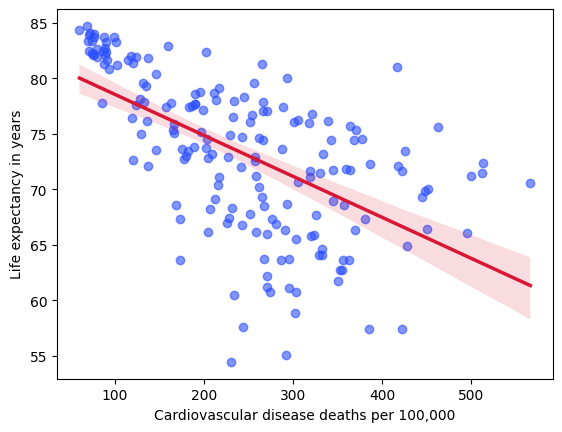

In [70]:
sns.regplot(data=df_merged,
            x="cvd_death_rate",
            y="life_expectancy",
            scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
            line_kws={'color': "#d91735", 'linewidth': 2.5})
plt.xlabel("Cardiovascular disease deaths per 100,000")
plt.ylabel("Life expectancy in years")

In [50]:
correlation, p_value = pearsonr(df_merged['cvd_death_rate'], df_merged['life_expectancy'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Cardiovascular Disease Deaths & Life Expectancy: ", correlation)
print("P-value, Cardiovascular Disease Deaths & Life Expectancy: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Cardiovascular Disease Deaths & Life Expectancy:  -0.5902588882518945
P-value, Cardiovascular Disease Deaths & Life Expectancy:  2.7839514865324054e-18
r-squared:  0.34840555516036253
r-squared percent: 34.84%


**Observations:** A correlation coefficient of -0.6 shows a strong negative correlation between life expectancy and cardiovascular disease. As cardiovascular disease prevalence rises, life expectancy falls. An r-squared of 0.34 of 0.34 indicates that CVD death rates explain 34% of the variation in life expectancy across countries."

In [51]:
# reshape the data from 1D to 2D
X = df_merged[['cvd_death_rate']]  
y = df_merged['life_expectancy']

In [52]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [53]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predictions
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
print("predicted values:", predictions)

# Print coefs
print("intercept:", lm.intercept_, "coeficent:", lm.coef_)

# R² score
r2 = lm.score(X_test, y_test)

# Errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

predicted values: [79.4765988  79.28602264 70.5893722  72.84392582 77.97656242 78.36688988
 65.17593041 73.04027574 73.0492417  75.92723596 74.08712463 79.92946394
 72.51158249 70.292474   73.26413461 72.99327316 63.756933   68.46600607
 74.07193179 74.87547905 72.38839465 65.72739591 73.54216287 71.32405013
 77.67218118 71.259316   75.05434214 69.69379369 77.27057389 80.22379628
 78.25414939 78.25787023 68.79928818 75.63023796 72.12167872 76.75438412]
intercept: 82.87200151141737 coeficent: [-0.03823928]
R²: 0.15526058202231896
MSE: 49.180669209312825
Root Mean Squared Error: 7.012893069861597
Mean Absolute Error: 5.38587103237385


**Observations:** 
- Intercept: 82.87 (theoretical life expectency for a country with no CVD deaths per 100,000)
- Coeficent: -0.03 
For every 1-point increase in CVD death rate (per 100k), life expectancy decreases by 0.03 years (about 11 days).
So if CVD deaths increase by 100 per 100k people, life expectancy drops by ~3 years.
- R-squared: Model explains 15% fo variance in unseen data.
- MAE: 5.3 year average error in predictions